# Интерполяция экспериментальных данных

## Task 1: Лагранж

### Init

#### Task description

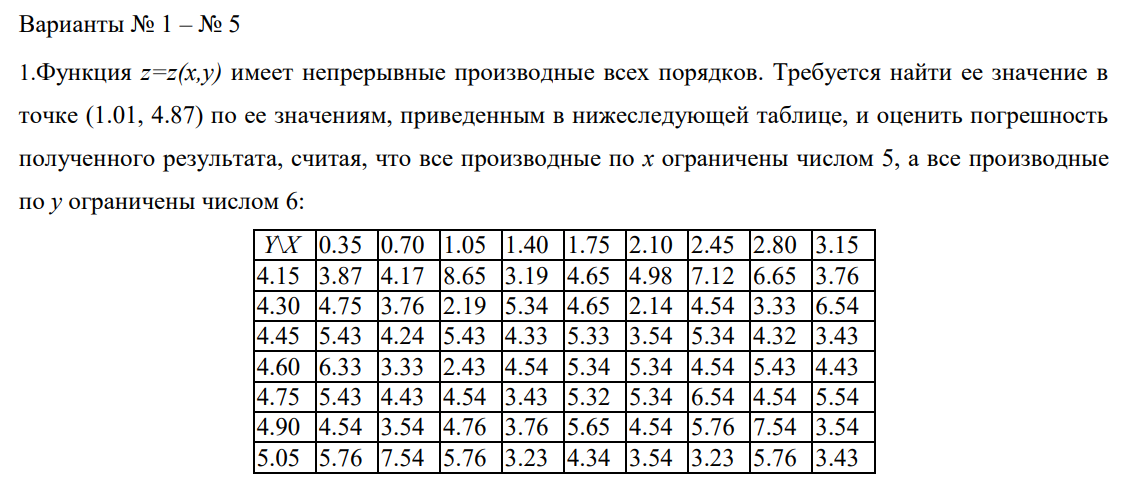

#### Init data

##### Start data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

xs = np.arange(0.35, 3.16, 0.35)
ys = np.arange(4.15, 5.06, 0.15)
LEN_X = len(xs)
LEN_Y = len(ys)
DATA = np.array([[3.87, 4.17, 8.65, 3.19, 4.65, 4.98, 7.12, 6.65, 3.76],
                [4.75, 3.76, 2.19, 5.34, 4.65, 2.14, 4.54, 3.33, 6.54],
                [5.43, 4.24, 5.43, 4.33, 5.33, 3.54, 5.34, 4.32, 3.43],
                [6.33, 3.33, 2.43, 4.54, 5.34, 5.34, 4.54, 5.43, 4.43],
                [5.43, 4.43, 4.54, 3.43, 5.32, 5.34, 6.54, 4.54, 5.54],
                [4.54, 3.54, 4.76, 3.76, 5.65, 4.54, 5.76, 7.54, 3.54],
                [5.76, 7.54, 5.76, 3.23, 4.34, 3.54, 3.23, 5.76, 3.43]])

Data_by_X = np.array([[(xs[j], ys[i], DATA[i, j]) for j in range(LEN_X)]
                      for i in range(LEN_Y)])


DATA_FULL = np.zeros((LEN_X * LEN_Y, 3))

counter = 0
for i in range(LEN_Y):
    for j in range(LEN_X):
        DATA_FULL[counter] = [xs[j], ys[i], DATA[i, j]]
        counter += 1


##### Def-s

In [ ]:
def lagranz(x, y, t):
    z = 0
    for j in range(len(y)):
        p1 = 1
        p2 = 1
        for i in range(len(x)):
            if i == j:
                p1 = p1*1
                p2 = p2*1
            else:
                p1 = p1*(t-x[i])
                p2 = p2*(x[j]-x[i])
        z = z+y[j]*p1/p2
    return z


### Interpolation

In [ ]:
searched_x = 1.01
searched_y = 4.87
result = 0

for i in range(LEN_X):
    for j in range(LEN_Y):
        term_x = DATA[j, i]
        term_y = 1
        for k in range(LEN_X):
            if k != i:
                term_x *= (searched_x - xs[k]) / \
                    (xs[i] - xs[k])
        for l in range(LEN_Y):
            if l != j:
                term_y *= (searched_y - ys[l]) / \
                    (ys[j] - ys[l])
        result += term_x * term_y

error = result - lagranz([searched_x], [searched_y], result) 

print(f'''
z({searched_x}, {searched_y}) = {np.round(result, 3)};
Error value = {np.round(error, 3)}
''')


### Plot

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_grid, y_grid = np.meshgrid(np.linspace(
    0.35, 1.95, 100), np.linspace(3.54, 8.35, 100))
z_grid = np.zeros_like(x_grid)

for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        x = x_grid[i, j]
        y = y_grid[i, j]
        z = 0.0
        for k in range(LEN_X):
            for l in range(LEN_Y):
                term_x = DATA[l, k]
                term_y = 1
                for m in range(LEN_X):
                    if m != k:
                        term_x *= (x - xs[m]) / (xs[k] - xs[m])
                for n in range(LEN_Y):
                    if n != l:
                        term_y *= (y - ys[n]) / (ys[l] - ys[n])
                z += term_x * term_y
        z_grid[i, j] = z

ax.plot_surface(x_grid, y_grid, z_grid, cmap="coolwarm")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter([searched_x], [searched_y], [result], color='black',
           marker='o', s=150, label=f'Spot ({searched_x}, {searched_y})')

ax.legend()

plt.show()


## Task 2: Бернштейн

### Init

#### Task

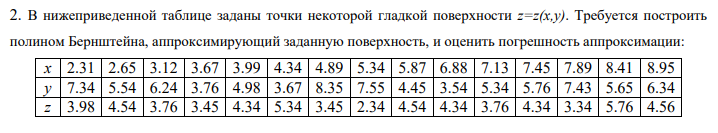

#### Start data

In [ ]:
X = np.array([2.31, 2.65, 3.12, 3.67, 3.99, 4.34, 4.89, 5.34, 5.87, 6.88, 7.13, 7.45, 7.89, 8.41, 8.95])
Y = np.array([7.34, 5.54, 6.24, 3.76, 4.98, 3.67, 8.35, 7.55, 4.45, 3.54, 5.34, 5.76, 7.43, 5.65, 6.34])
Z = np.array([3.98, 4.54, 3.76, 3.45, 4.34, 5.34, 3.45, 2.34, 4.54, 4.34, 3.76, 4.34, 3.34, 5.76, 4.56])

LEN_DATA = len(X)

### Bernshtain implementation

In [ ]:
from scipy.special import comb

def bernstein_polynomial(x, y, z, t):
    n = len(x)
    result = 0
    for i in range(n):
        basis = comb(n - 1, i) * (t ** i) * ((1 - t) ** (n - 1 - i))
        result += basis * z[i]
    return result
error = 0
for x, y, z in zip(X, Y, Z):
    t = (x - min(X)) / (max(X) - min(X))
    interpolated_z = bernstein_polynomial(X, Y, Z, t)
    error += (interpolated_z - z) ** 2
error = np.sqrt(error)


In [ ]:
print(f"Approximation error: {np.round(error, 3)}")
x_range = np.linspace(min(X), max(X), 100)
y_range = np.linspace(min(Y), max(Y), 100)
xs, ys = np.meshgrid(x_range, y_range)
zs = np.zeros(xs.shape)
for i in range(xs.shape[0]):
    for j in range(xs.shape[1]):
        t = (xs[i, j] - min(X)) / (max(X) - min(X))
        zs[i, j] = bernstein_polynomial(X, Y, Z, t)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xs, ys, zs, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
plt.title('Approximation by Bernshtain polinom')
plt.show()

# Интерполяция функций сплайном третьего порядка

## Init

### Task

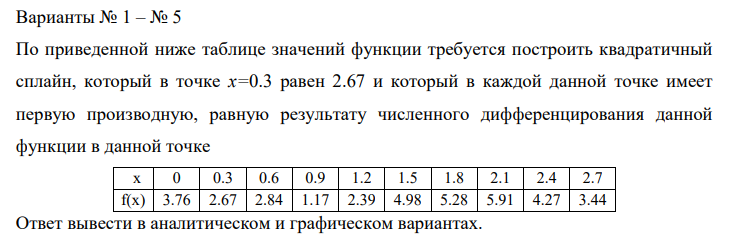

### Start data

In [22]:
X = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7])
F = np.array([3.76, 2.67, 2.84, 1.17, 2.39, 4.98, 5.28, 5.91, 4.27, 3.44])

LEN_DATA = len(X)
SEARCHED_X = 0.3
SEARCHED_X_VALUE = 2.67

## Implementation

In [23]:
from scipy.interpolate import CubicSpline

sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
F_sorted = F[sorted_indices]

cs = CubicSpline(X_sorted, F_sorted, bc_type=((1, 0.0), (1, 0.0)))
SEARCHED_X_SPLINE_VALUE = cs(SEARCHED_X)

### Analitics

In [27]:
Y_interp_deriv = cs.derivative()(X)

print(f"Spline value at x = {SEARCHED_X}: {SEARCHED_X_SPLINE_VALUE}")
print("First spline derivative at every point:")
for i in range(len(X)):
    print(f"x = {X[i]}: {np.round(Y_interp_deriv[i], 3)}")

Spline value at x = 0.3: 2.67
First spline derivative at every point:
x = 0.0: 0.0
x = 0.3: -1.635
x = 0.6: -2.66
x = 0.9: -2.726
x = 1.2: 9.063
x = 1.5: 4.572
x = 1.8: 1.547
x = 2.1: -1.459
x = 2.4: -5.81
x = 2.7: 0.0


### Plot

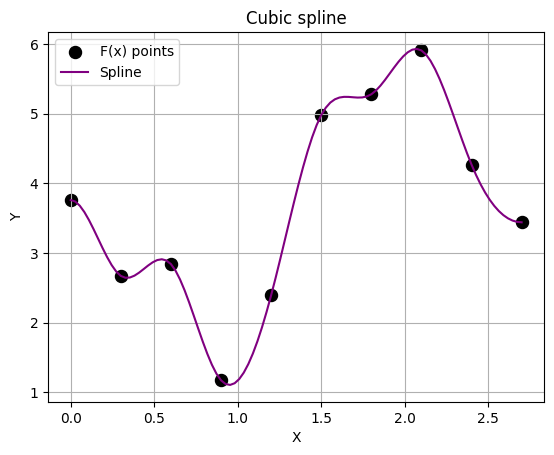

In [33]:
x_plot = np.linspace(min(X_sorted), max(X_sorted), 100)
y_plot = cs(x_plot)

plt.scatter(X_sorted, F_sorted, 75, c='black', label='F(x) points')
plt.plot(x_plot, y_plot, c='purple', label='Spline')
plt.title('Cubic spline')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()